In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from scipy.io import arff

## Bank Marketing Dataset

In [2]:
train = pd.read_csv('./archive/train.csv', sep=';')
test = pd.read_csv('./archive/test.csv', sep=';')

train.info()
test.info()

pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 co

In [3]:
train.head()
print(train.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
print(train.isna().values.any())
print(train.isna().sum())

print(train.duplicated().value_counts())
train.columns = train.columns.str.replace(' ', '')

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False    45211
Name: count, dtype: int64


In [6]:
job_type = train["job"]
print(job_type.value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [7]:
marital_status = train["marital"]
print(marital_status.value_counts())

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [8]:
education_status = train["education"]
print(education_status.value_counts())

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [9]:
default_status = train["default"]
print(default_status.value_counts())

default
no     44396
yes      815
Name: count, dtype: int64


In [10]:
housing_loan_status = train["housing"]
print(housing_loan_status.value_counts())

housing
yes    25130
no     20081
Name: count, dtype: int64


In [11]:
personal_loan_status = train["loan"]
print(personal_loan_status.value_counts())

loan
no     37967
yes     7244
Name: count, dtype: int64


In [12]:
contact_type = train["contact"]
print(contact_type.value_counts())

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [13]:
previous_num_of_contacts = train["previous"]
print(previous_num_of_contacts.value_counts())

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


In [14]:
previous_campaign_outcome = train["poutcome"]
print(previous_campaign_outcome.value_counts())

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [15]:
y_status = train["y"]
print(y_status.value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


### Age

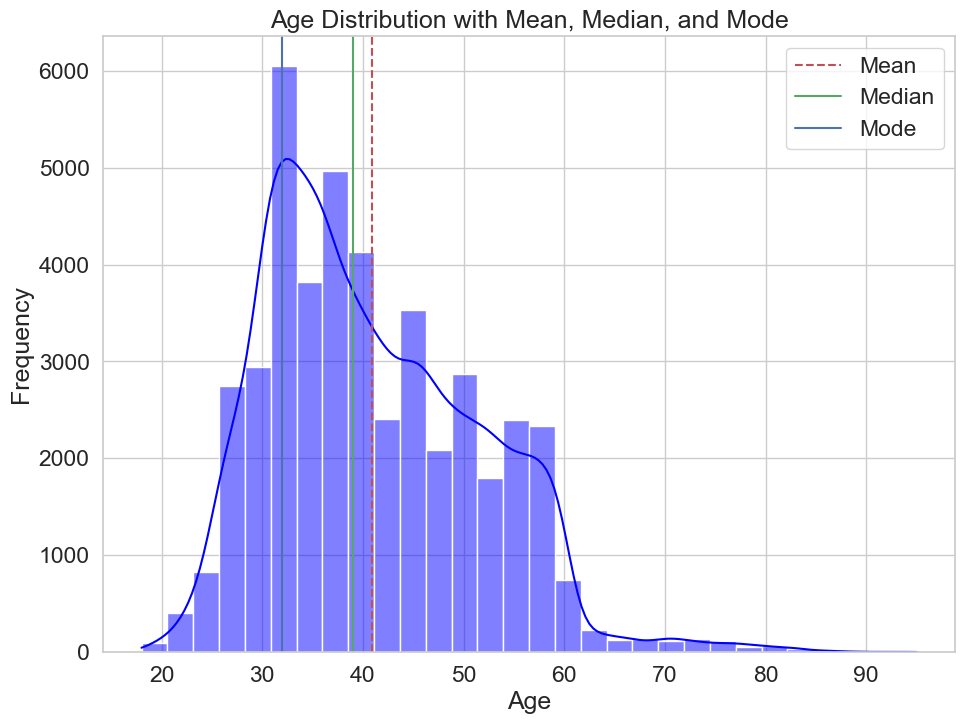

In [19]:
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')

# Calculate mean, median, and mode
mean = train['age'].mean()
median = train['age'].median()
mode = train['age'].mode().values[0]

# Create histogram with KDE and vertical lines for mean, median, mode
plt.figure(figsize=(11, 8))
sns.histplot(data=train, x="age", kde=True, color='blue', bins=30)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.title("Age Distribution with Mean, Median, and Mode")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Job type

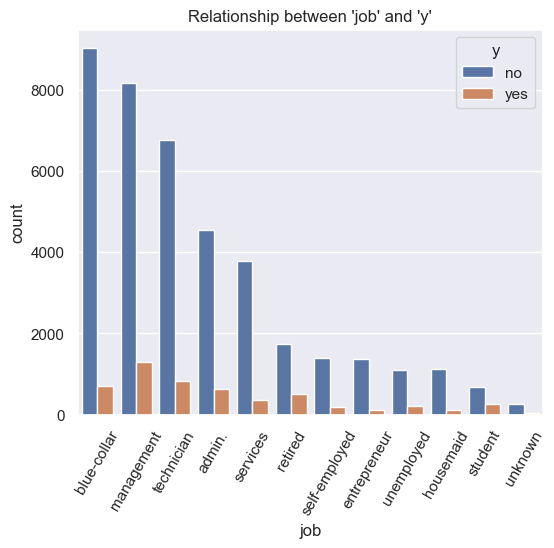

In [20]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "y", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'job' and 'y'")
plt.show()

### Marital status

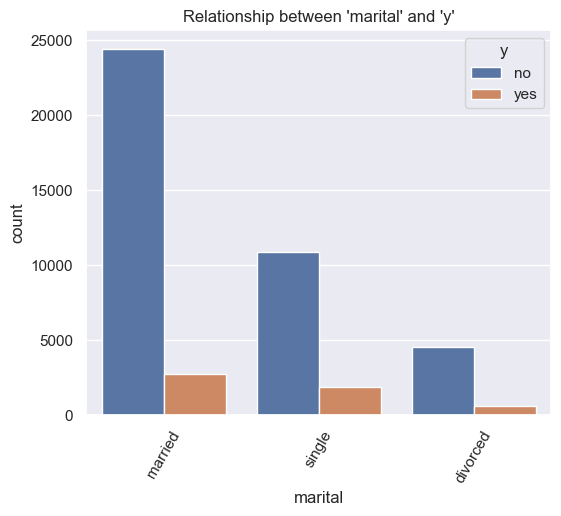

In [21]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "y", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'marital' and 'y'")
plt.show()

### Education status

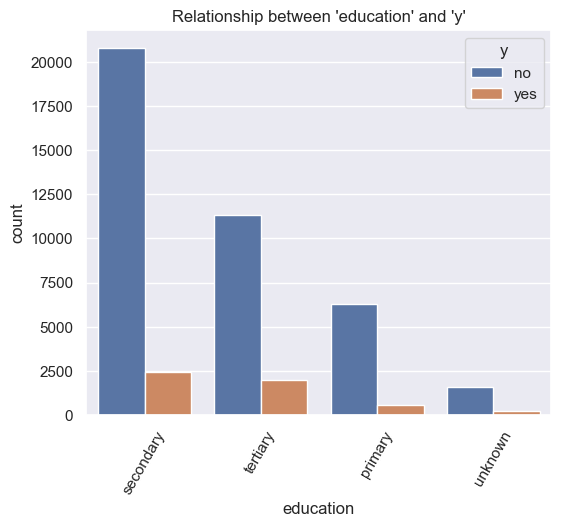

In [22]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "y", order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'education' and 'y'")
plt.show()

### Credit default status

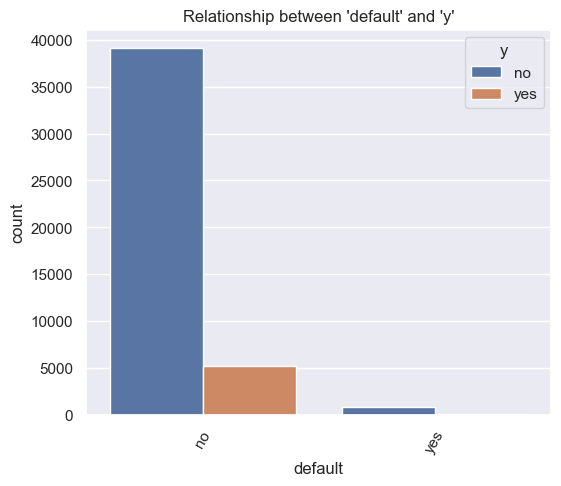

In [23]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "y", order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'default' and 'y'")
plt.show()

### Average yearly balance

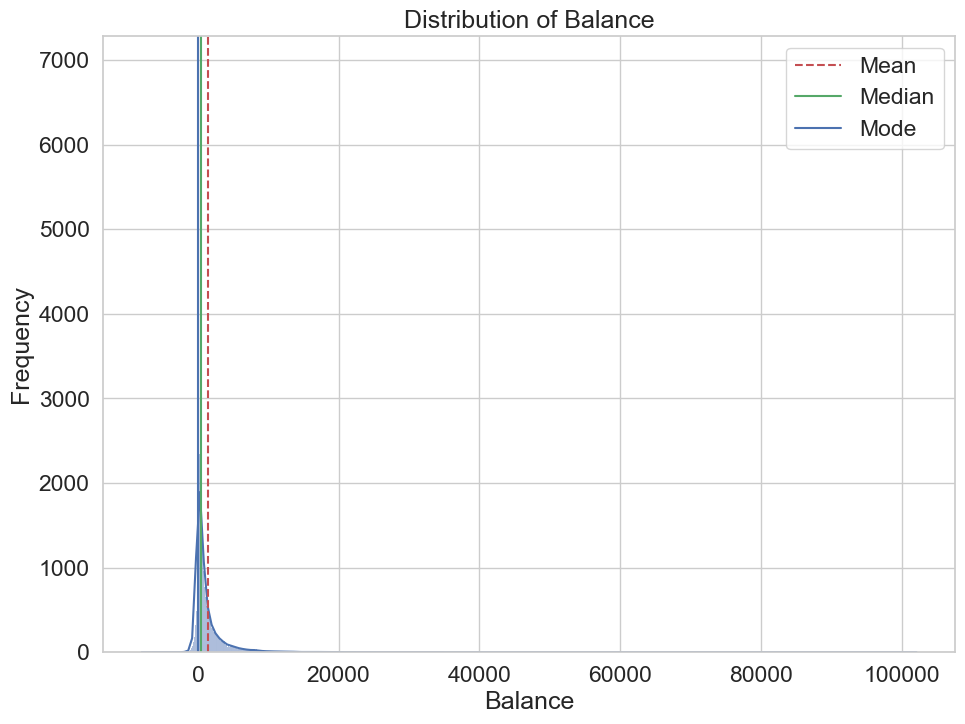

In [25]:
# Set visualization settings
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')

# Calculate statistical values
mean = train['balance'].mean()
median = train['balance'].median()
mode = train['balance'].mode().values[0]

# Create a single subplot for the histogram
plt.figure(figsize=(11, 8))

# Plot the histogram with KDE
sns.histplot(data=train, x="balance", kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Balance")

# Display the plot
plt.show()


### Housing loan status

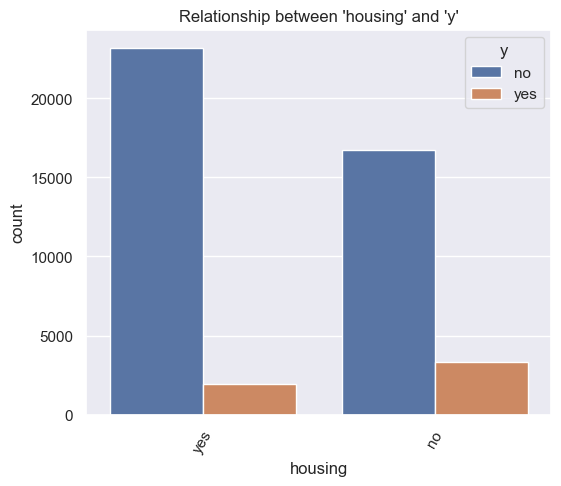

In [26]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "y", order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'housing' and 'y'")
plt.show()

### Personal loan status

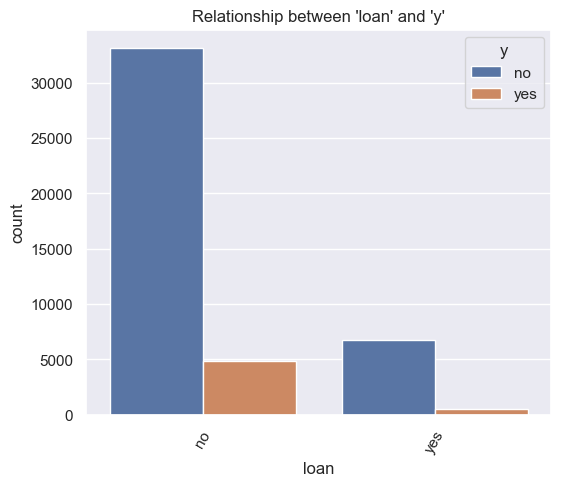

In [27]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "y", order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'loan' and 'y'")
plt.show()

### Contact communication type

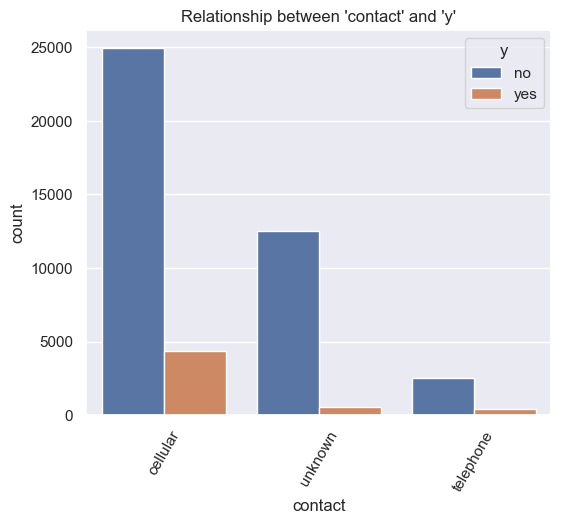

In [28]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "y", order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'contact' and 'y'")
plt.show()

### Last contact day of the month

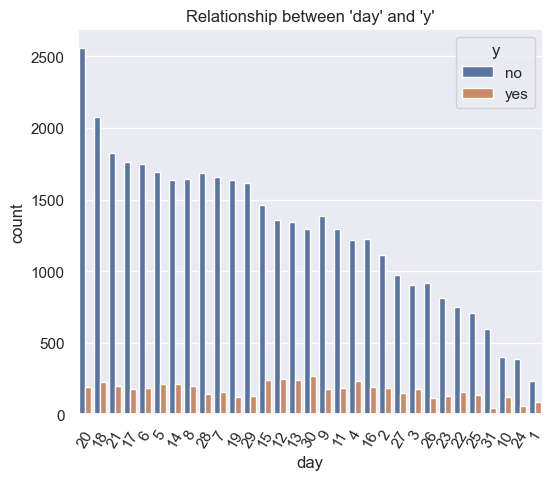

In [29]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="day", data = train, hue = "y", order = train["day"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'day' and 'y'")
plt.show()

### Last contact month of the year

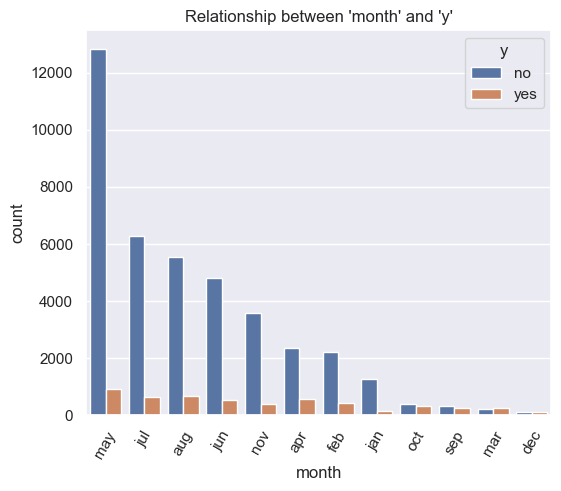

In [31]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "y", order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'month' and 'y'")
plt.show()

### Last contact duration (in seconds)

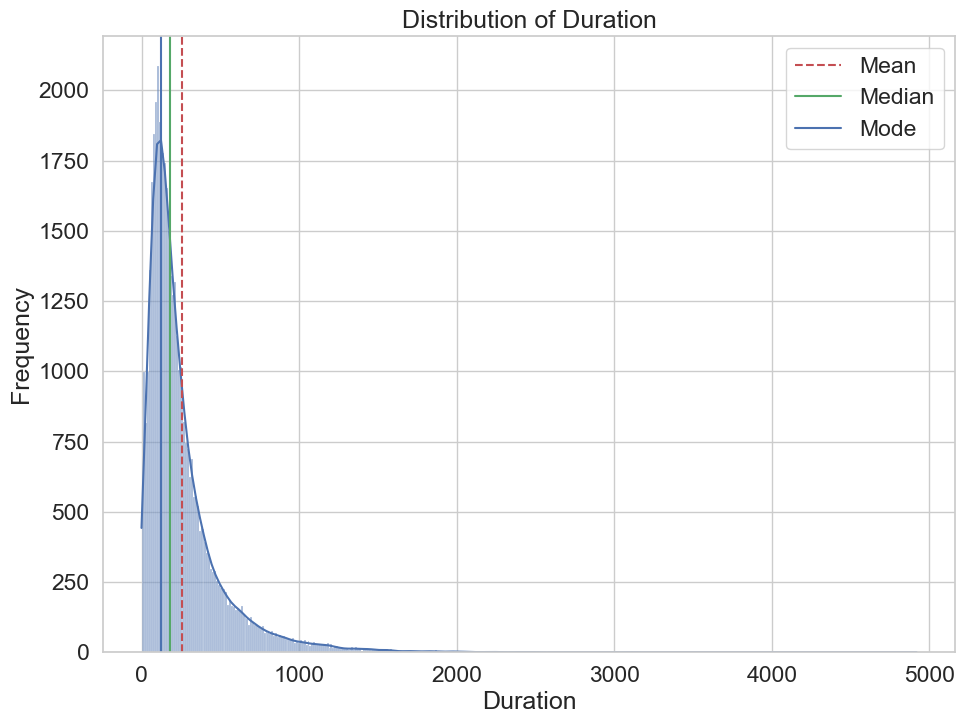

In [32]:
# Set visualization settings
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')

# Calculate statistical values
mean = train['duration'].mean()
median = train['duration'].median()
mode = train['duration'].mode().values[0]

# Create a single plot for the histogram
plt.figure(figsize=(11, 8))

# Plot the histogram with KDE
sns.histplot(data=train, x="duration", kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Duration")

# Display the plot
plt.show()

### Number of contacts performed during this campaign

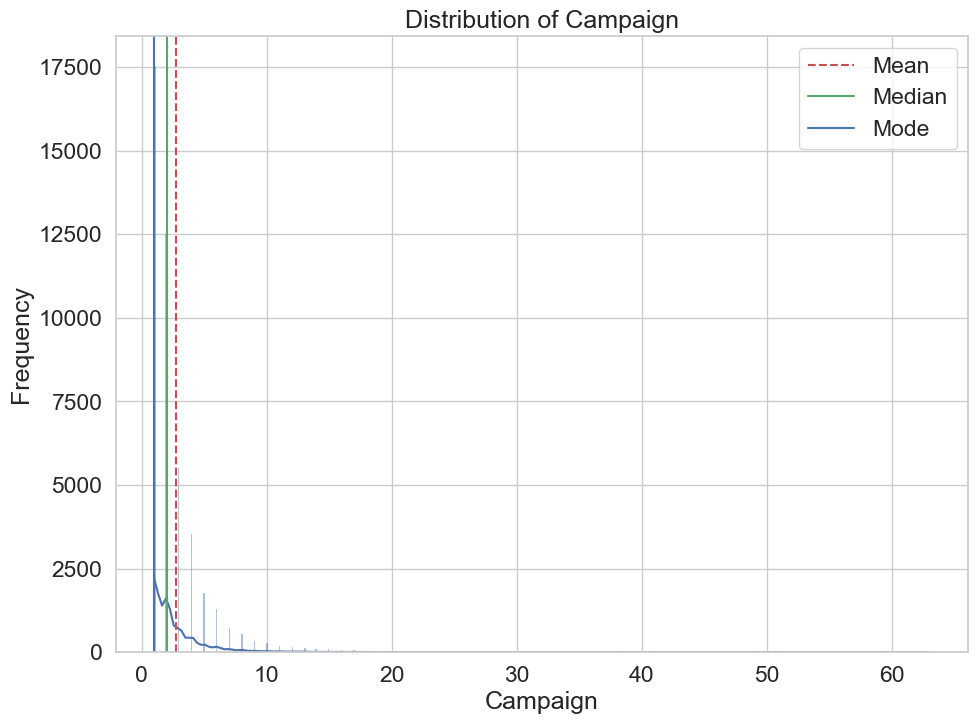

In [33]:
# Set visualization settings
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')

# Calculate statistical values
mean = train['campaign'].mean()
median = train['campaign'].median()
mode = train['campaign'].mode().values[0]

# Create a single plot for the histogram
plt.figure(figsize=(11, 8))

# Plot the histogram with KDE
sns.histplot(data=train, x="campaign", kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.title("Distribution of Campaign")

# Display the plot
plt.show()


### Number of days since last contact

Mean: 40.19782796222158
Median: -1.0


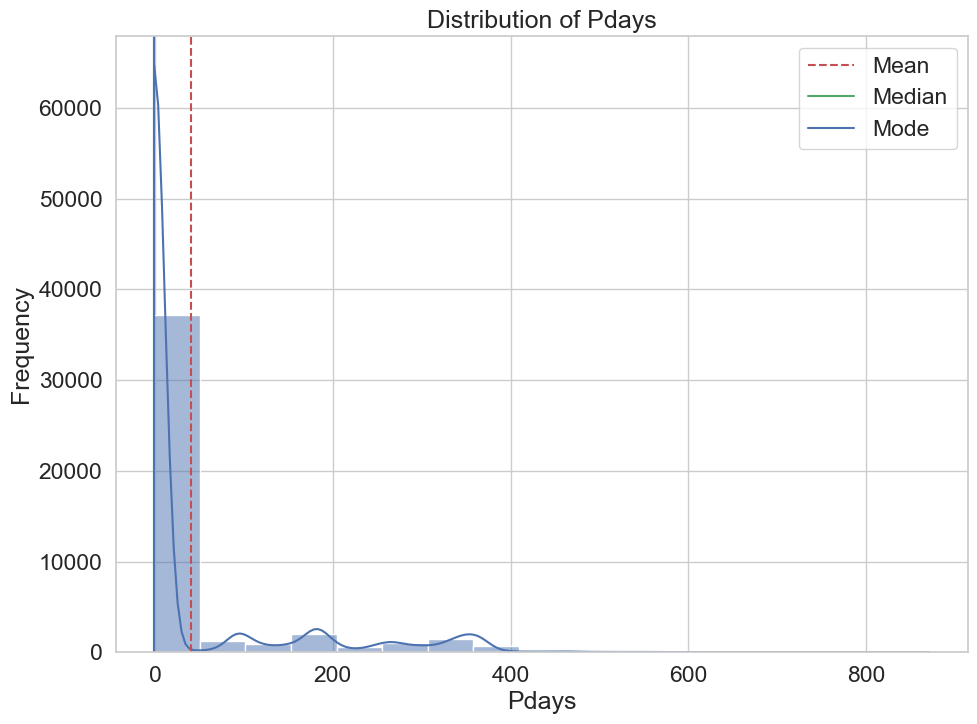

In [34]:
# Set visualization settings
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')

# Calculate statistical values
mean = train['pdays'].mean()
print("Mean:", mean)
median = train['pdays'].median()
print("Median:", median)
mode = train['pdays'].mode().values[0]

# Create a single plot for the histogram
plt.figure(figsize=(11, 8))

# Plot the histogram with KDE
sns.histplot(data=train, x="pdays", kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.xlabel("Pdays")
plt.ylabel("Frequency")
plt.title("Distribution of Pdays")

# Display the plot
plt.show()


### Number of contacts before this campaign

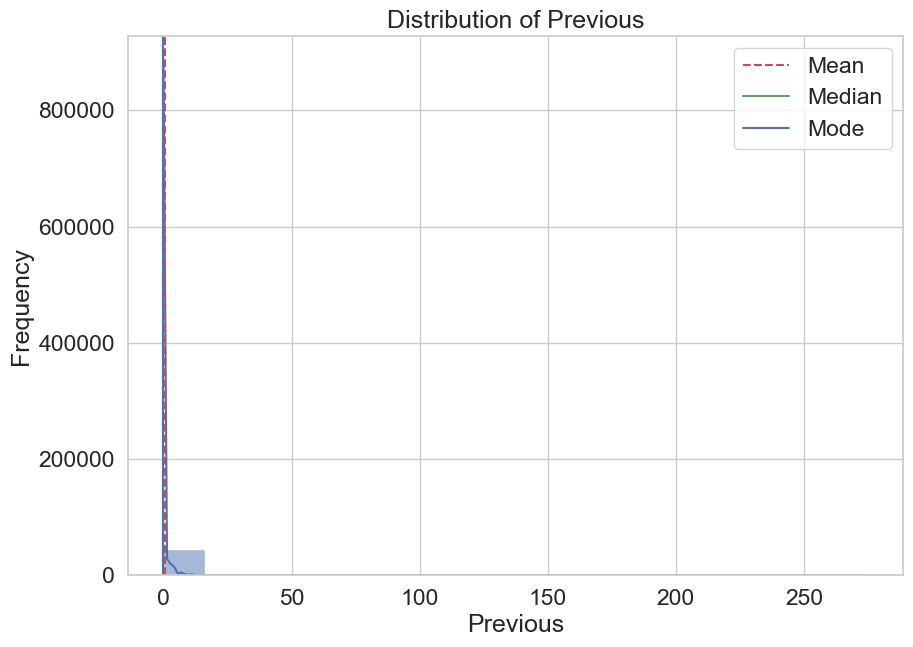

In [36]:
sns.set(rc={'figure.figsize': (10, 7)}, font_scale=1.5, style='whitegrid')

# Calculate statistical values
mean = train['previous'].mean()
median = train['previous'].median()
mode = train['previous'].mode().values[0]

# Create a single plot for the histogram
plt.figure(figsize=(10, 7))

# Plot the histogram with KDE
sns.histplot(data=train, x="previous", kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend and labels
plt.legend()
plt.xlabel("Previous")
plt.ylabel("Frequency")
plt.title("Distribution of Previous")

# Display the plot
plt.show()


### Outcome of previous marketing campaign

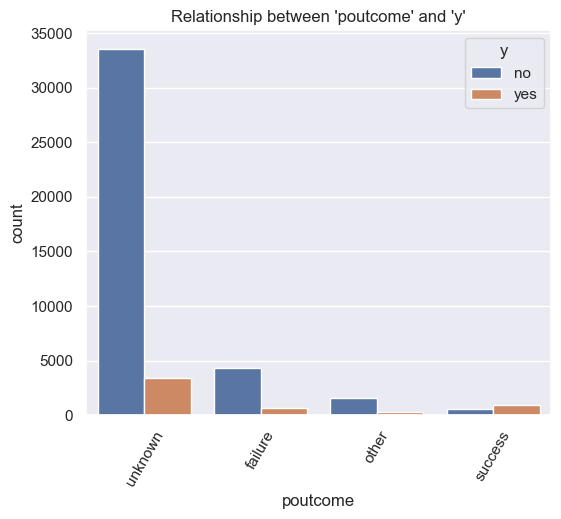

In [37]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "y", order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'poutcome' and 'y'")
plt.show()

### Target (Client subscribed term deposit ?)

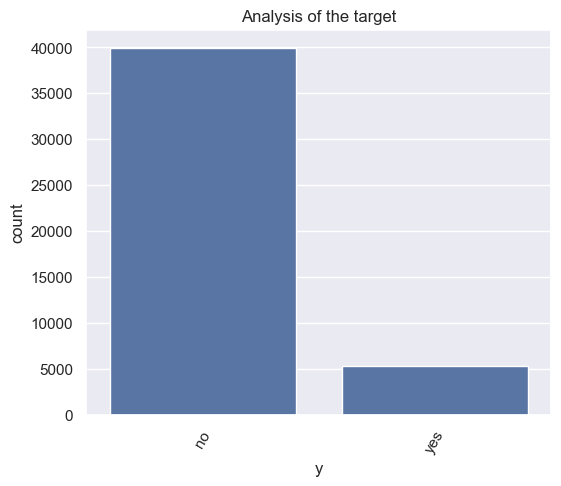

In [38]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = train, order = train["y"].value_counts().index)
target.tick_params(axis='x', rotation=60)
plt.title("Analysis of the target")
plt.show()

In [39]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [40]:
data = pd.concat([train, test], ignore_index=True)
#data = pd.read_csv('C:\\Users\\Dell\\Desktop\\final project SSD\\archive\\train.csv', sep=';')

# Step 2: Convert the original 'y' column to 1/0
# Map 'yes' to 1 and 'no' to 0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Step 3: Convert categorical columns to numerical using one-hot encoding
# Identify categorical columns (excluding 'y' as it has been converted already)
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Step 4: Normalize numerical columns
# Identify numerical columns (exclude columns that were one-hot encoded)
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns and transform them
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Step 5: Convert boolean values (True/False) to integers (1/0) without affecting other data
# Only convert the columns with boolean values
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Step 6: Display the normalized dataset with the updated 'y' column
print("Normalized Data:")
print(data_encoded.head())

# Optional: Save the normalized dataset to a new CSV file
data_encoded.to_csv('normalized_dataset.csv', index=False, sep=';')

Normalized Data:
        age   balance       day  duration  campaign  pdays  previous  y  \
0  0.519481  0.092259  0.133333  0.053070       0.0    0.0       0.0  0   
1  0.337662  0.073067  0.133333  0.030704       0.0    0.0       0.0  0   
2  0.194805  0.072822  0.133333  0.015453       0.0    0.0       0.0  0   
3  0.376623  0.086476  0.133333  0.018707       0.0    0.0       0.0  0   
4  0.194805  0.072812  0.133333  0.040260       0.0    0.0       0.0  0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0

In [41]:
print(data_encoded.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [42]:
# Find columns with only one unique value
constant_columns = [col for col in data_encoded.columns if data_encoded[col].nunique() == 1]
print("Columns with constant values:", constant_columns)

Columns with constant values: []


In [43]:
# Find columns with more than 70% missing values
missing_percentage = data_encoded.isnull().mean() * 100
redundant_columns = missing_percentage[missing_percentage > 70].index.tolist()
print("Columns with more than 70% missing values:", redundant_columns)

Columns with more than 70% missing values: []


Top 10 Positive Correlations:
 poutcome_failure    pdays              0.701718
education_tertiary  job_management     0.597728
previous            pdays              0.461822
month_jun           contact_unknown    0.452299
job_retired         age                0.447901
month_may           housing_yes        0.426623
                    contact_unknown    0.426265
poutcome_other      pdays              0.389126
poutcome_failure    previous           0.358072
education_primary   job_blue-collar    0.342979
dtype: float64

Top 10 Negative Correlations:
 default_yes         default_no            -1.000000
loan_yes            loan_no               -1.000000
housing_yes         housing_no            -1.000000
poutcome_unknown    pdays                 -0.869758
contact_unknown     contact_cellular      -0.862097
marital_single      marital_married       -0.771629
poutcome_unknown    poutcome_failure      -0.738382
education_tertiary  education_secondary   -0.663152
poutcome_unknown    previo

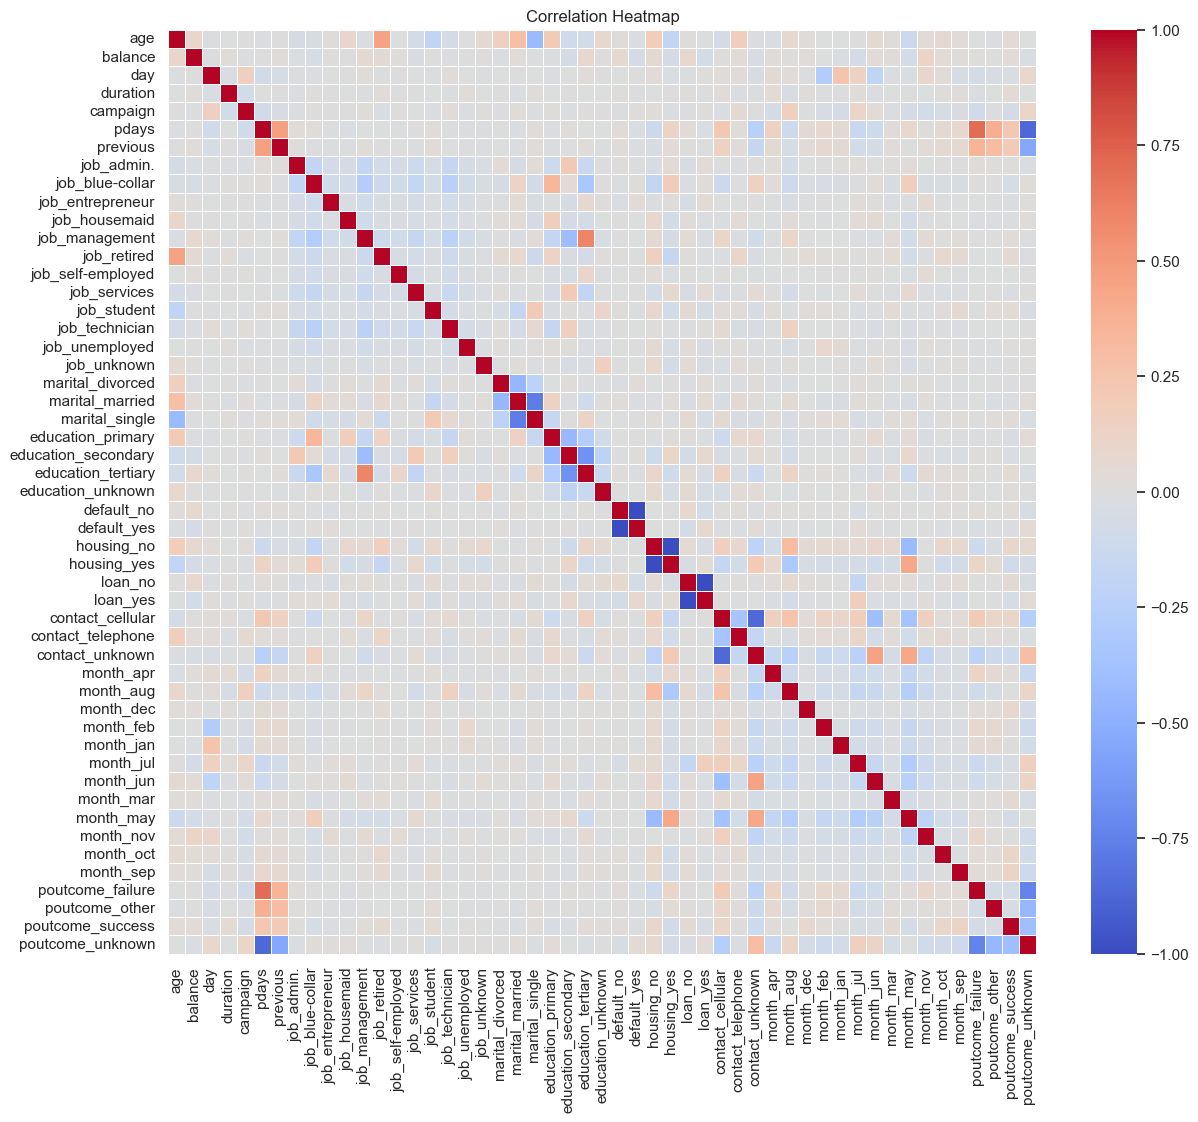

In [95]:
# Step 1: Load the normalized dataset
# Assuming 'data_encoded' is already available as the normalized dataset from previous steps

# Step 2: Remove the y column ('y') from the dataset
data_encoded_filtered = data_encoded.drop(['y'], axis=1)

# Step 3: Calculate the correlation matrix for the filtered dataset
corr_matrix = data_encoded_filtered.corr()

# Step 4: Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 5: Separate positive and negative correlations
# Flatten the matrix and drop NA values
flattened_corr = upper_triangle.unstack().dropna()

# Get the top 10 positive correlations (sorted by value)
top_10_positive = flattened_corr[flattened_corr > 0].sort_values(ascending=False).head(10)
print("Top 10 Positive Correlations:\n", top_10_positive)

# Get the top 10 negative correlations (sorted by value)
top_10_negative = flattened_corr[flattened_corr < 0].sort_values().head(10)
print("\nTop 10 Negative Correlations:\n", top_10_negative)

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Logistic Regression

Recall Logistic Regression: 0.8060
Logistic Regression Accuracy: 0.8440348525469169
Precision: 0.4087136929460581
Recall: 0.8059614260666277
F1 Score: 0.5423795476892822
Confusion Matrix:
 [[11214  1995]
 [  332  1379]]


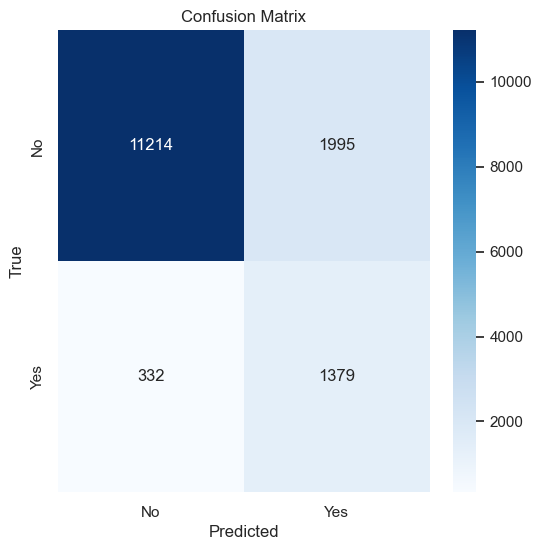

In [53]:
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
# Assuming 'data_encoded' is your normalized dataset

target_label = 'y'

# Drop the target label column from the feature set
X = data_encoded.drop([target_label], axis=1)
y = data_encoded[target_label]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply class weights ('balanced' automatically adjusts for imbalance)
clf = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = clf.predict(X_test)

recall_log = recall_score(y_test, y_pred_log)
print(f"Recall Logistic Regression: {recall_log:.4f}")

# Evaluate Decision Tree accuracy
logistic_regression_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Step 2: Calculate precision, recall, F1-score, AUC, and ROC Curve

# Precision
precision_log = precision_score(y_test, y_pred_log)
print("Precision:", precision_log)

# Recall
recall_log = recall_score(y_test, y_pred_log)
print("Recall:", recall_log)

# F1 Score
f1_log = f1_score(y_test, y_pred_log)
print("F1 Score:", f1_log)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

metrics = {}

# Store the results
metrics['Logistic Regression'] = {
    'Precision': precision_log,
    'Recall': recall_log,
    'F1 Score': f1_log,
}

### Handling Class Imbalance

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the oversampler
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after SMOTE:
y
0    30713
1    30713
Name: count, dtype: int64


### Decision Tree Classifier

Decision Tree Accuracy: 0.874597855227882
Precision: 0.46554694229112836
Recall: 0.6317942723553478
F1 Score: 0.5360773617654352
Confusion Matrix:
 [[11968  1241]
 [  630  1081]]


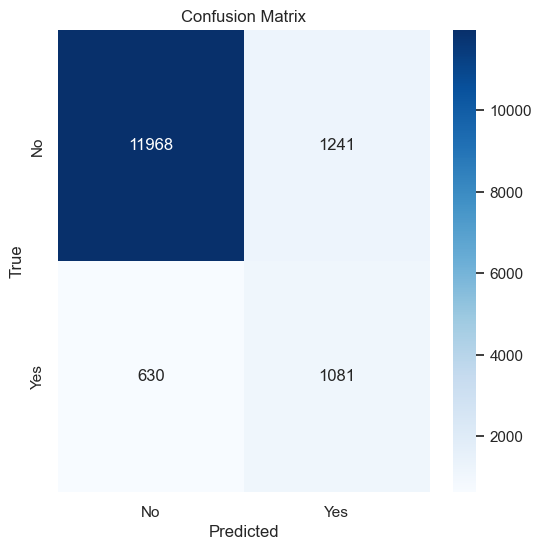

In [54]:
# Step 1: Train a Decision Tree classifier to further detect anomalies
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_balanced, y_train_balanced)

# Predict anomalies on the test set using the Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Step 2: Calculate precision, recall, F1-score, AUC, and ROC Curve

# Precision
precision = precision_score(y_test, y_pred_decision_tree)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_decision_tree)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_decision_tree)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Store the results
metrics['Decision Tree Classifier'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

### KNN Classifier

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Recall (Cross-Validation): 0.9670834845601306
Tuned KNN Precision: 0.42454394693200664
Tuned KNN Recall: 0.5984804208065458
Tuned KNN F1 Score: 0.49672568518069365


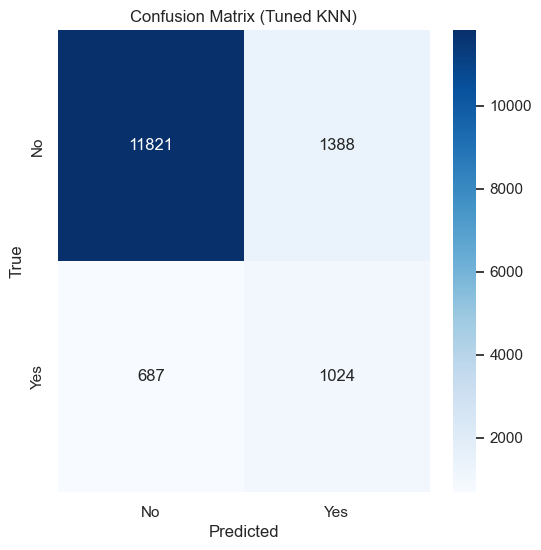

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Create the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1  # Show progress
)

# Perform grid search on the balanced training set
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the corresponding recall score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Recall (Cross-Validation):", best_recall)

# Train the best model on the training set
best_knn = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_knn_tuned = best_knn.predict(X_test)

# Metrics for the tuned model
tuned_precision = precision_score(y_test, y_pred_knn_tuned)
tuned_recall = recall_score(y_test, y_pred_knn_tuned)
tuned_f1 = f1_score(y_test, y_pred_knn_tuned)

print("Tuned KNN Precision:", tuned_precision)
print("Tuned KNN Recall:", tuned_recall)
print("Tuned KNN F1 Score:", tuned_f1)

# Store the results
metrics['KNN Classifier'] = {
    'Precision': tuned_precision,
    'Recall': tuned_recall,
    'F1 Score': tuned_f1,
}

# Confusion Matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Tuned KNN)')
plt.show()


### Local Outlier Factor

In [64]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, recall_score

def lof_anomaly_detection(X, y):
    """
    Perform anomaly detection using Local Outlier Factor with focus on high recall
    
    Parameters:
    X : feature matrix
    y : true labels
    
    Returns:
    Dictionary with detection results
    """
    from sklearn.model_selection import train_test_split

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Multiple scaling approaches
    scalers = [
        StandardScaler(),
        MinMaxScaler()
    ]
    
    best_recall = 0
    best_results = None
    
    # Define LOF hyperparameter grid
    param_grid = {
        'n_neighbors': [5, 10, 15, 20],
        'contamination': [0.05, 0.1, 0.15],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [20, 30, 40]
    }
    
    # Iterate over scalers and hyperparameter grid
    for scaler in scalers:
        # Scale features
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        for n_neighbors in param_grid['n_neighbors']:
            for contamination in param_grid['contamination']:
                for algorithm in param_grid['algorithm']:
                    for leaf_size in param_grid['leaf_size']:
                        
                        # Initialize LOF
                        lof = LocalOutlierFactor(
                            n_neighbors=n_neighbors,
                            contamination=contamination,
                            algorithm=algorithm,
                            leaf_size=leaf_size,
                            novelty=False
                        )
                        
                        # Predict anomalies
                        y_pred = lof.fit_predict(X_test_scaled)
                        
                        # Convert predictions to binary (1=Anomaly, 0=Normal)
                        y_pred_binary = np.where(y_pred == -1, 1, 0)
                        
                        # Calculate recall for anomalies
                        recall = recall_score(y_test, y_pred_binary, pos_label=1)

                        precision = precision_score(y_test, y_pred_binary)
                        
                        # F1 Score
                        f1 = f1_score(y_test, y_pred_binary)
                        
                        # Update best results if current recall is higher
                        if recall > best_recall:
                            best_recall = recall
                            best_results = {
                                'model': lof,
                                'params': {
                                    'n_neighbors': n_neighbors,
                                    'contamination': contamination,
                                    'algorithm': algorithm,
                                    'leaf_size': leaf_size
                                },
                                'scaler': scaler.__class__.__name__,
                                'predictions': y_pred_binary,
                                'classification_report': classification_report(
                                    y_test, y_pred_binary, target_names=["Normal", "Anomaly"]
                                ),
                                'recall': recall,
                                'precision': precision,
                                'f1': f1
                            }
    
    # Print the best results
    print("Best Scaler:", best_results['scaler'])
    print("Best Parameters:", best_results['params'])
    print("\nClassification Report:")
    print(best_results['classification_report'])
    print(f"\nBest Recall for Anomalies: {best_results['recall']:.4f}")
    
    return best_results

# Generate synthetic anomaly dataset
from sklearn.datasets import make_classification
    
# Create a dataset with more pronounced anomalies
X, y = make_classification(
    n_samples=1000,  # Increased sample size
    n_features=15,   # More features
    n_informative=10,  # More informative features
    n_redundant=3,   # Few
    n_clusters_per_class=1,
    weights=[0.9],   # Imbalanced dataset (10% anomalies)
    random_state=42
)
    
# Run anomaly detection
results = lof_anomaly_detection(X, y)

# Store the results
metrics['Local Outlier Classifier'] = {
    'Precision': results['precision'],
    'Recall': results['recall'],
    'F1 Score': results['f1'],
}

Best Scaler: StandardScaler
Best Parameters: {'n_neighbors': 20, 'contamination': 0.15, 'algorithm': 'auto', 'leaf_size': 20}

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.92      0.95       179
     Anomaly       0.53      0.76      0.63        21

    accuracy                           0.91       200
   macro avg       0.75      0.84      0.79       200
weighted avg       0.92      0.91      0.91       200


Best Recall for Anomalies: 0.7619


In [65]:
# Print out the metrics for all models
print("\nModel Performance Comparison:")
for model, metric_values in metrics.items():
    print(f"\n{model}:")
    for metric, value in metric_values.items():
        print(f"  {metric}: {value:.4f}")

# Create a summary DataFrame to display the results
metrics_df = pd.DataFrame(metrics).T
print("\nSummary of Model Performance:")
print(metrics_df)


Model Performance Comparison:

Logistic Regression:
  Precision: 0.4087
  Recall: 0.8060
  F1 Score: 0.5424

Decision Tree Classifier:
  Precision: 0.4655
  Recall: 0.6318
  F1 Score: 0.5361

KNN Classifier:
  Precision: 0.4245
  Recall: 0.5985
  F1 Score: 0.4967

Local Outlier Classifier:
  Precision: 0.5333
  Recall: 0.7619
  F1 Score: 0.6275

Summary of Model Performance:
                          Precision    Recall  F1 Score
Logistic Regression        0.408714  0.805961  0.542380
Decision Tree Classifier   0.465547  0.631794  0.536077
KNN Classifier             0.424544  0.598480  0.496726
Local Outlier Classifier   0.533333  0.761905  0.627451


### Chosen model - Local Outlier Classifier

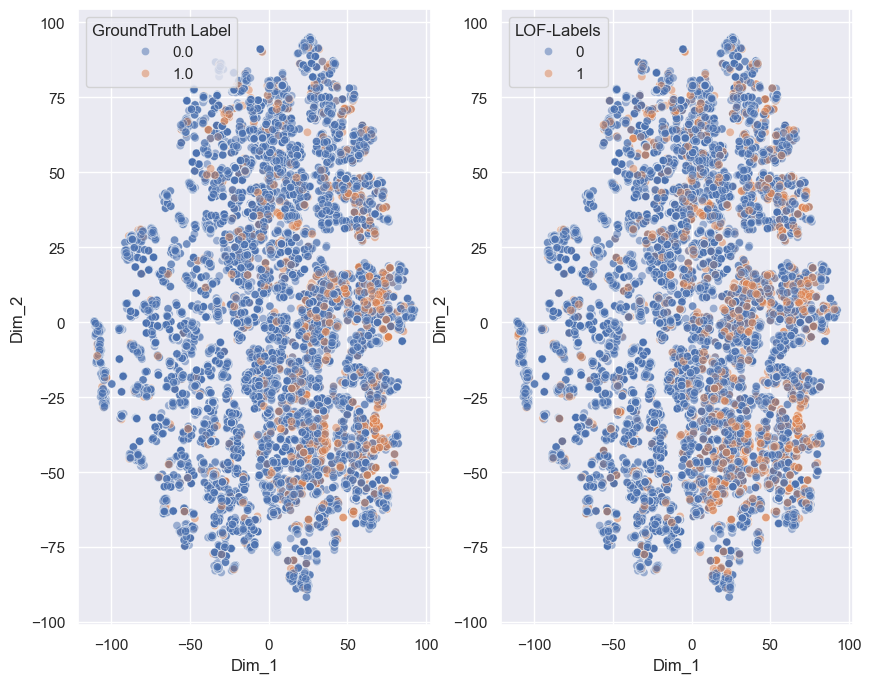

In [77]:
# Performing tsne transformation on the data for helping in visualisation later
tsne=TSNE(n_components=2, random_state=42,perplexity=40)
X_tsne=tsne.fit_transform(X_test)
labels=np.array(y_test).reshape(-1,1)
# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((X_tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "GroundTruth Label"))

tsne_df_copy= tsne_df.copy()
tsne_df_copy['LOF-Labels']= y_pred_decision_tree


# Relevant code for plotting the given class labels and cluster labels
colors = sns.color_palette()

modes_gt=tsne_df_copy['GroundTruth Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_copy['LOF-Labels'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

plt.figure(figsize = (10, 8))
# plotting tsne for groundtruth labels
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax,hue='GroundTruth Label',palette=palette_gt,alpha=0.5);
# plotting tsne for cluster labels using LOF
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax, hue='LOF-Labels',palette=palette_clus,alpha=0.5);
plt.show()

## Census Dataset

In [78]:
data, meta = arff.loadarff('census-income-full-nominal.arff')
df = pd.DataFrame(data)

print(df.select_dtypes(['object']).columns)

# Convert columns to appropriate numerical types
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bytes':
        try:
            df[col] = pd.to_numeric(df[col], errors='ignore')
        except ValueError:
            pass

# Decode byte columns to strings if necessary
for col in df.select_dtypes(['object']):
    df[col] = df[col].str.decode('utf-8')

##### Normalize
# Step 1: Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'class']

# Step 2: Normalize numerical columns using Min-Max Scaler
scaler = MinMaxScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Step 3: One-Hot Encode categorical columns
df_categorical_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)

# Step 4: Concatenate the scaled numerical data and encoded categorical data
df_normalized = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

# Display the final DataFrame
print(df_normalized.head())

target_label = 'class'
#df.dropna(subset=[target_label], inplace=True)
df[target_label] = np.where(df[target_label] == '--50000.', 0, 
                             np.where(df[target_label] == '50000+.', 1, np.nan))
# Drop the target label column from the feature set
X = df_normalized
y = df[target_label]

print(y.value_counts())

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['att2', 'att3', 'att4', 'att5', 'att7', 'att8', 'att9', 'att10',
       'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att20', 'att21',
       'att22', 'att23', 'att24', 'att26', 'att27', 'att28', 'att29', 'att30',
       'att32', 'att33', 'att34', 'att35', 'att36', 'att37', 'att38', 'att39',
       'att41', 'class'],
      dtype='object')


/tmp/ipykernel_35071/3727113528.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


       att3      att4  att37  att39  att41  att2_Local-government  \
0  0.000000  0.000000    0.0    1.0    0.0                  False   
1  0.568627  0.695652    0.0    1.0    1.0                  False   
2  0.000000  0.000000    0.0    1.0    1.0                  False   
3  0.000000  0.000000    0.0    0.0    1.0                  False   
4  0.000000  0.000000    0.0    0.0    0.0                  False   

   att2_Never-worked  att2_Not-in-universe  att2_Private  \
0              False                  True         False   
1              False                 False          True   
2              False                  True         False   
3              False                  True         False   
4              False                  True         False   

   att2_Self-employed-incorporated  att2_Self-employed-not-incorporated  \
0                            False                                False   
1                            False                                False   

### Handling Class Imbalance

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the oversampler
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after SMOTE:
class
0.0    196591
1.0    196591
Name: count, dtype: int64


### Logistic Regression

Recall Logistic Regression: 0.6633
Logistic Regression Accuracy: 0.8937028044461275
Precision: 0.32952949438202245
Recall: 0.6632508833922262
F1 Score: 0.44030025803424816
Confusion Matrix:
 [[76488  7638]
 [ 1906  3754]]


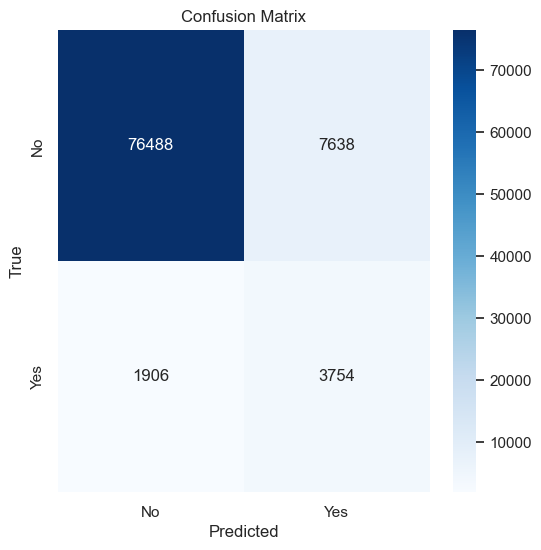

In [88]:
from sklearn.linear_model import LogisticRegression
 
# Initialize and train Logistic Regression 
clf = LogisticRegression(max_iter=1000, random_state=42) 
clf.fit(X_train_balanced, y_train_balanced.dropna()) 

# Predict and evaluate
y_pred_log = clf.predict(X_test)

recall_log = recall_score(y_test, y_pred_log)
print(f"Recall Logistic Regression: {recall_log:.4f}")

# Evaluate Decision Tree accuracy
logistic_regression_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Calculate precision, recall, F1-score, AUC, and ROC Curve

# Precision
precision = precision_score(y_test, y_pred_log)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_log)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_log)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

metrics = {}

# Store the results
metrics['Logistic Regression'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

### Decision Tree Classifier

Decision Tree Accuracy: 0.9071347426102065
Precision: 0.32505879278808464
Recall: 0.43957597173144874
F1 Score: 0.37374192579239895
Confusion Matrix:
 [[78960  5166]
 [ 3172  2488]]


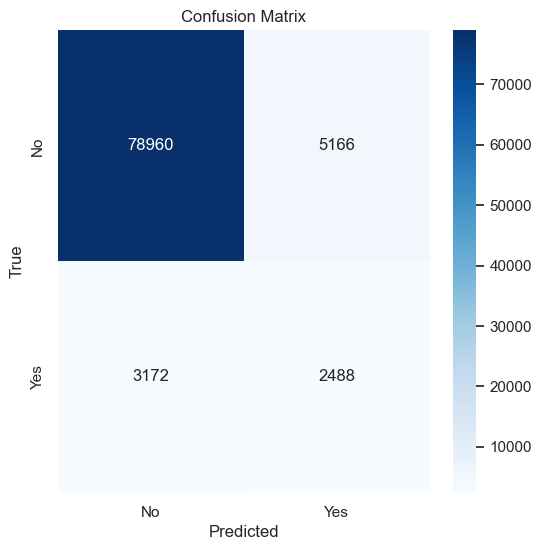

In [90]:
# Step 1: Train a Decision Tree classifier to further detect anomalies
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_balanced, y_train_balanced)

# Predict anomalies on the test set using the Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Step 2: Calculate precision, recall, F1-score, AUC, and ROC Curve

# Precision
precision = precision_score(y_test, y_pred_decision_tree)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_decision_tree)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_decision_tree)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Store the results
metrics['Decision Tree Classifier'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

### KNN Classifier

Precision: 0.3873270211216315
Recall: 0.4697879858657244
F1 Score: 0.42459081836327345
Confusion Matrix:
 [[79920  4206]
 [ 3001  2659]]


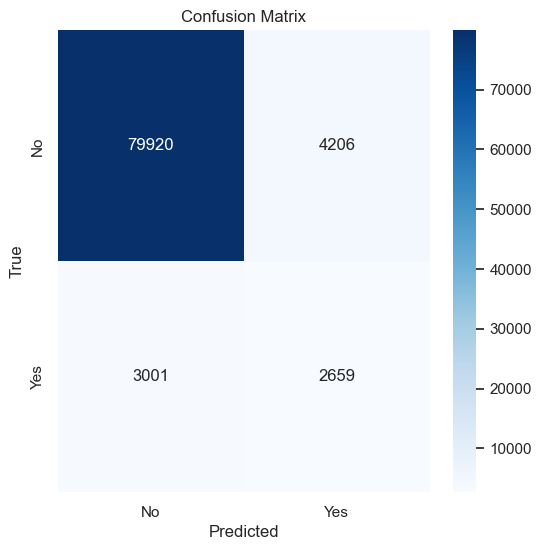

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k (number of neighbors) as needed
knn.fit(X_train_balanced, y_train_balanced.dropna())

# Predict using KNN
y_pred_knn = knn.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Store the results
metrics['KNN'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

In [93]:
# Print out the metrics for all models
print("\nModel Performance Comparison:")
for model, metric_values in metrics.items():
    print(f"\n{model}:")
    for metric, value in metric_values.items():
        print(f"  {metric}: {value:.4f}")

# Create a summary DataFrame to display the results
metrics_df = pd.DataFrame(metrics).T
print("\nSummary of Model Performance:")
print(metrics_df)


Model Performance Comparison:

Logistic Regression:
  Precision: 0.3295
  Recall: 0.6633
  F1 Score: 0.4403

Decision Tree Classifier:
  Precision: 0.3251
  Recall: 0.4396
  F1 Score: 0.3737

KNN:
  Precision: 0.3873
  Recall: 0.4698
  F1 Score: 0.4246

Summary of Model Performance:
                          Precision    Recall  F1 Score
Logistic Regression        0.329529  0.663251  0.440300
Decision Tree Classifier   0.325059  0.439576  0.373742
KNN                        0.387327  0.469788  0.424591


### Choosen model - Logistic Regression

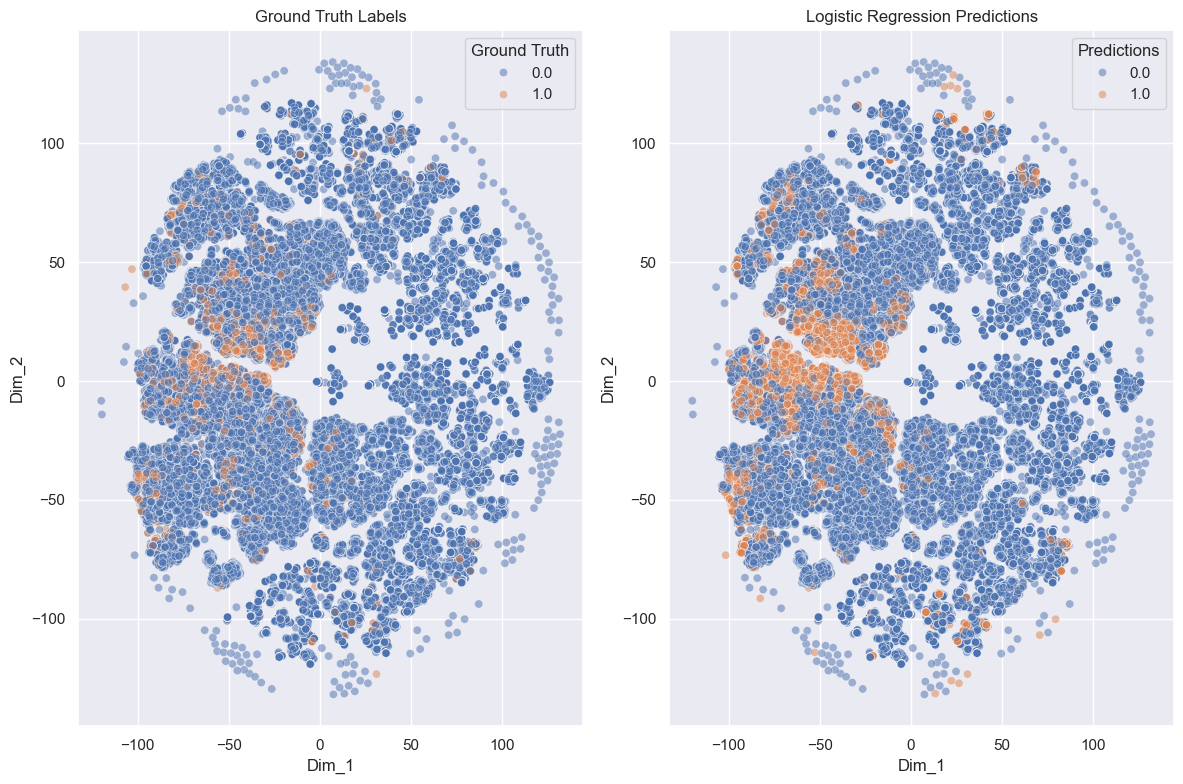

In [94]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Perform t-SNE transformation on the test data for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X_test)

# Create a DataFrame to help with plotting the t-SNE transformed data
# Ensure that y_test and y_pred_log have compatible shapes for this purpose
tsne_data = np.concatenate((X_tsne, np.array(y_test).reshape(-1, 1)), axis=1)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "GroundTruth Label"))

# Create a copy of the t-SNE DataFrame and add the logistic regression predictions
tsne_df_copy = tsne_df.copy()
tsne_df_copy['Logistic Regression Labels'] = y_pred_log

# Define color palettes for both ground truth and predicted labels
colors = sns.color_palette()

# Ground truth palette
modes_gt = tsne_df_copy['GroundTruth Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

# Logistic regression palette
modes_pred = tsne_df_copy['Logistic Regression Labels'].unique()
palette_pred = {mode: color for mode, color in zip(modes_pred, colors)}

# Plotting the t-SNE for ground truth and logistic regression predictions
plt.figure(figsize=(12, 8))

# Plot t-SNE for ground truth labels
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax=ax, hue='GroundTruth Label', palette=palette_gt, alpha=0.5)
ax.set_title("Ground Truth Labels")
ax.legend(title="Ground Truth")

# Plot t-SNE for logistic regression predictions
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax=ax, hue='Logistic Regression Labels', palette=palette_pred, alpha=0.5)
ax.set_title("Logistic Regression Predictions")
ax.legend(title="Predictions")

plt.tight_layout()
plt.show()